In [1]:
import numpy as np
import pandas as pd

In [2]:
sentiment_df = pd.read_csv('../data/Twitter_Data.csv', names=['text', 'sentiment'])
sentiment_df = sentiment_df.iloc[1:, :]
sentiment_df.shape

(162980, 2)

In [3]:
sentiment_df = sentiment_df.dropna()
print(f"Text NaN: {sentiment_df['text'].isna().sum()}")
print(f"Sentiment NaN: {sentiment_df['sentiment'].isna().sum()}")

Text NaN: 0
Sentiment NaN: 0


In [4]:
sentiment_df.loc[:, 'text'] = sentiment_df.loc[:, 'text'].fillna('').astype(str)
sentiment_df.loc[:, 'sentiment'] = sentiment_df.loc[:, 'sentiment'].fillna('').astype(str)
sentiment_df.loc[:, 'sentiment'] = sentiment_df.loc[:, 'sentiment'].astype(str)
sentiment_df.head()

,text,sentiment
1,when modi promised “minimum government maximum...,-1
2,talk all the nonsense and continue all the dra...,0
3,what did just say vote for modi welcome bjp t...,1
4,asking his supporters prefix chowkidar their n...,1
5,answer who among these the most powerful world...,1


In [5]:
cat_mapping = {
    '-1': 'Negative',
    '0': 'Neutral',
    '1': 'Positive'
}

sentiment_df.loc[:, 'sentiment'] = sentiment_df.loc[:, 'sentiment'].map(cat_mapping)
sentiment_df.head()

,text,sentiment
1,when modi promised “minimum government maximum...,Negative
2,talk all the nonsense and continue all the dra...,Neutral
3,what did just say vote for modi welcome bjp t...,Positive
4,asking his supporters prefix chowkidar their n...,Positive
5,answer who among these the most powerful world...,Positive


In [6]:
import nltk
from nltk.corpus import stopwords
from nltk.classify import SklearnClassifier
from nltk.tokenize import word_tokenize

from wordcloud import WordCloud,STOPWORDS
import matplotlib.pyplot as plt
import string

In [7]:
def preprocess_text(text):
    if isinstance(text, float):
        return ''
        
    text = text.lower()
    # Remove punctuations here
    text = text.translate(str.maketrans('', '', string.punctuation))
    # This code here will tokenize the text
    tokens = word_tokenize(text)
    # This here removes the stopwords
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]
    # Join tokens back into a single string
    return ' '.join(tokens)

In [8]:
sentiment_df['text'] = sentiment_df['text'].apply(preprocess_text)
sentiment_df.head()

,text,sentiment
1,modi promised “ minimum government maximum gov...,Negative
2,talk nonsense continue drama vote modi,Neutral
3,say vote modi welcome bjp told rahul main camp...,Positive
4,asking supporters prefix chowkidar names modi ...,Positive
5,answer among powerful world leader today trump...,Positive


In [9]:
from sklearn.model_selection import train_test_split

In [80]:
# Feature
X = sentiment_df[['text']]
y = sentiment_df[['sentiment']]

# Splitting Data for Training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

y_train = y_train.values.ravel()
y_test = y_test.values.ravel()

X_train = X_train.squeeze()
X_test = X_test.squeeze()

In [82]:
print(f"X Train Shape: {X_train.shape} ")
print(f"X Test Shape: {X_test.shape} ")
print(f"Y Train Shape: {y_train.shape} ")
print(f"Y Test Shape: {y_test.shape} ")

X Train Shape: (130375,) 
X Test Shape: (32594,) 
Y Train Shape: (130375,) 
Y Test Shape: (32594,) 


In [84]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [86]:
# Create a TF-IDF vectorizer
vectorizer = TfidfVectorizer(max_features=5000)

# Fit and transform training data and also the testing data
X_train_tfidf = vectorizer.fit_transform(X_train)
X_test_tfidf = vectorizer.transform(X_test)

# Now we train the Sentiment Analysis Model here

In [88]:
from sklearn.linear_model import LogisticRegression

In [89]:
y.isna().sum()

sentiment    0
dtype: int64

In [90]:
print(f"X Train TFIDF Shape: {X_train_tfidf.shape}")
print(f"X Test TFIDF Shape: {X_test_tfidf.shape}")

X Train TFIDF Shape: (130375, 5000)
X Test TFIDF Shape: (32594, 5000)


In [91]:
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

C:\Users\kurtj\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [97]:
from sklearn.metrics import accuracy_score, classification_report

In [101]:
# Predict on test set
y_pred = model.predict(X_test_tfidf)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

# Classification report
print(f"Classification Report: {classification_report(y_test, y_pred)}")

Accuracy: 0.8921273854083573
Classification Report:               precision    recall  f1-score   support

    Negative       0.88      0.78      0.83      7152
     Neutral       0.86      0.97      0.91     11067
    Positive       0.92      0.89      0.91     14375

    accuracy                           0.89     32594
   macro avg       0.89      0.88      0.88     32594
weighted avg       0.89      0.89      0.89     32594



# Making Prediction on New Data

In [150]:
new_text = "It's a fast car"
new_text_preprocessed = preprocess_text(new_text)

new_text_tfidf = vectorizer.transform([new_text_preprocessed])
new_prediction = model.predict(new_text_tfidf)

print(f"Predicted Sentiment: {new_prediction[0]}")

Predicted Sentiment: Positive


# Generate WordCloud for each Sentiment Category

In [128]:
def generate_wordcloud(text_data, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(text_data))
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.title(title, fontsize=24)
    plt.axis('off')
    plt.show()

In [130]:
# Separate Data by Sentiment
negative_text = sentiment_df[sentiment_df['sentiment'] == 'Negative']['text']
neutral_text = sentiment_df[sentiment_df['sentiment'] == 'Neutral']['text']
positive_text = sentiment_df[sentiment_df['sentiment'] == 'Positive']['text']

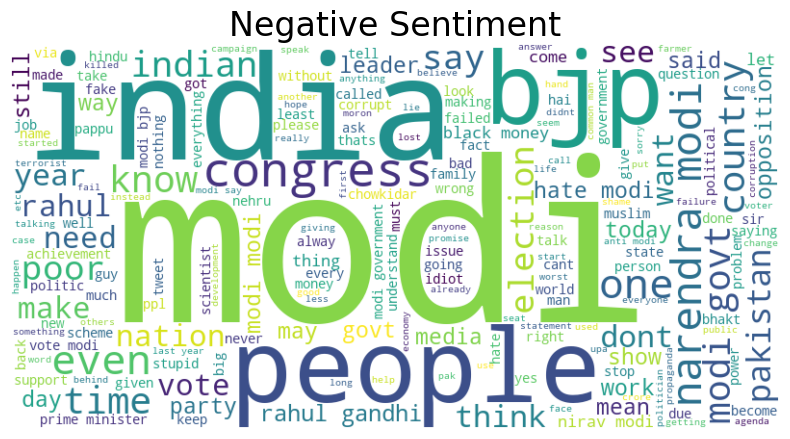

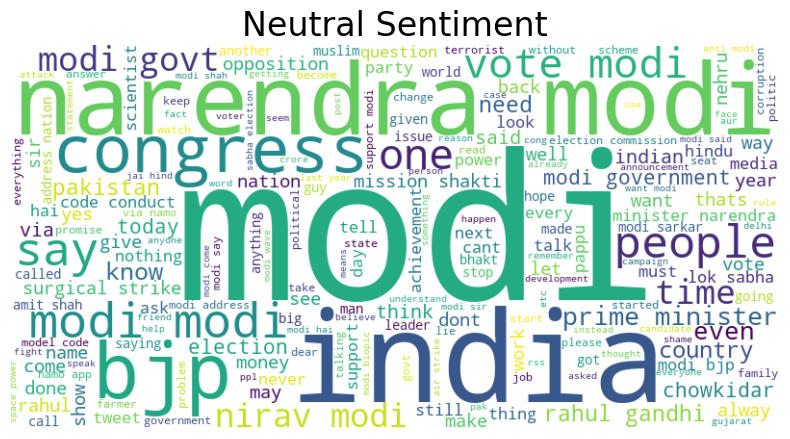

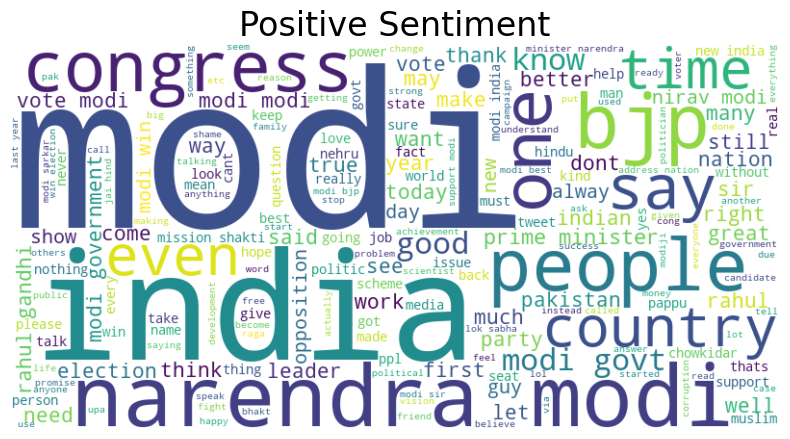

In [132]:
# Generate and Display Word Clouds
generate_wordcloud(negative_text, 'Negative Sentiment')
generate_wordcloud(neutral_text, 'Neutral Sentiment')
generate_wordcloud(positive_text, 'Positive Sentiment')

# Saving the Model and Vectorizer

In [159]:
import joblib

In [161]:
# Code to Save the Trained Model and Vectorizer
joblib.dump(model, 'sentiment_model.pkl')
joblib.dump(vectorizer, 'sentiment_vectorizer.pkl')
print('Success')

Success
